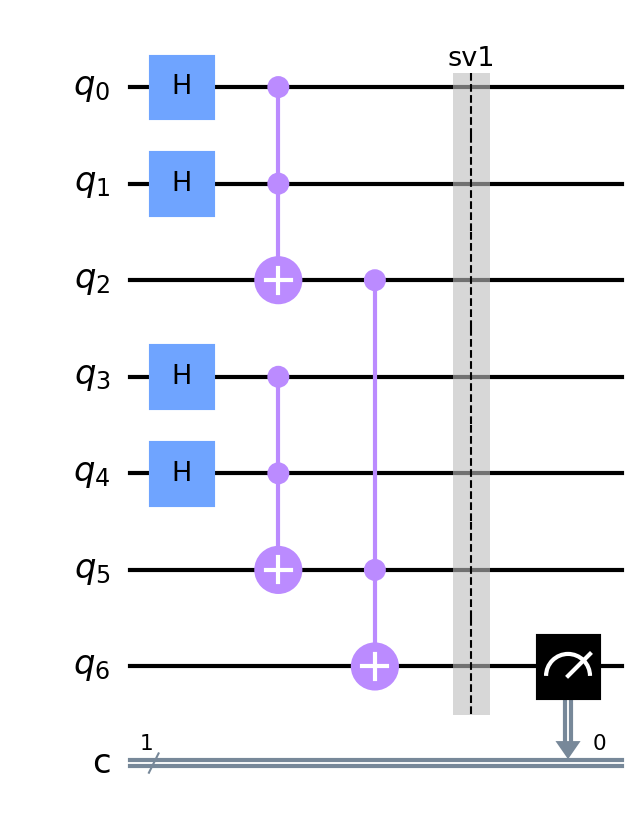

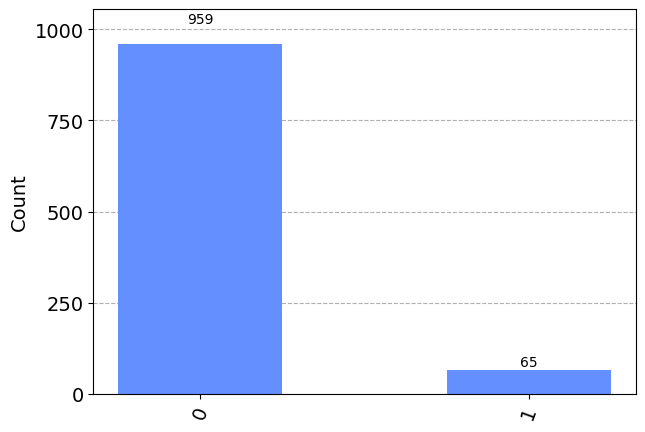

In [1]:
"""quantum_circuit3.ipynb"""
# Cell 1

# Task 23-03 - Caroline Cummings

# Code adapted from boolean_gates.ipynb Cell 1
from __future__ import annotations

import typing

from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_bloch_multivector  # type: ignore
from qiskit.visualization import plot_histogram  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

# Using the qubit simulator
backend: Any = Aer.get_backend("aer_simulator")

# 7 qubits with one measurement (default 1024 shots)
qc: Any = QuantumCircuit(7, 1)
qc.h(0)
qc.h(1)
qc.h(3)
qc.h(4)
qc.ccx(0, 1, 2)
qc.ccx(3, 4, 5)
qc.ccx(2, 5, 6)
qc.save_statevector("sv1")
qc.measure(6, 0)

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

# Display circuit and histogram associated with q6
display(qc.draw(output="mpl", scale=1.5))
display(plot_histogram(counts))  # type: ignore

In [2]:
# Cell 2

# Explain probability of q6 == 1 if there was no quantum noise.
    # There is a small possibility that q6 == 1 when q0, q1 and q3, q4 are both 1, making q2 and q5 == 1, which makes q6 == 1.
    # In other words, q6 == 1 only when all of the other qubits are 1.
    # The probability of this happening is 1/16 because q0, q1, q3, q4 all have probability 1/2 of being 1 so the chance they are
    # all 1 is 1/2 * 1/2 * 1/2 * 1/2 = 1/16.
    # Thus, if there was no quantum noise, the count of q6 == 1 should be 64, which is close to the estimation by the system 
    # with noise. 